# Classification of coffee beans based on country of origin

All cells in this notebook are intended to be run sequentially. Comments and headers are included throughout for clariication regarding different cells. The results in this notebook are used in the final report. Note, figure sizes can be adjusted in the plt.rcParams in the following code cell.

# Import packages

In [47]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import matplotlib.style as style
sns.set()
style.use('ggplot')
plt.rcParams['figure.figsize'] = [7, 5]

# Machine learning
import sklearn as sklearn
from sklearn.ensemble import ExtraTreesClassifier             # Feature importance
from sklearn.model_selection import train_test_split          # Split data into train and test set
from sklearn.preprocessing import StandardScaler              # Standardize data
from sklearn.metrics import confusion_matrix                  # Compute confusion matrix
from sklearn.metrics import accuracy_score                    # Accuracy of model - not used?
from sklearn.model_selection import GridSearchCV              # Grid search cross validation
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
df_full = pd.read_csv('arabica_data_cleaned.csv')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
Unnamed: 0               1311 non-null int64
Species                  1311 non-null object
Owner                    1304 non-null object
Country.of.Origin        1310 non-null object
Farm.Name                955 non-null object
Lot.Number               270 non-null object
Mill                     1001 non-null object
ICO.Number               1165 non-null object
Company                  1102 non-null object
Altitude                 1088 non-null object
Region                   1254 non-null object
Producer                 1081 non-null object
Number.of.Bags           1311 non-null int64
Bag.Weight               1311 non-null object
In.Country.Partner       1311 non-null object
Harvest.Year             1264 non-null object
Grading.Date             1311 non-null object
Owner.1                  1304 non-null object
Variety                  1110 non-null object
Processing.Method      

# Exploratory Data Analysis
In this section, we looked at the data and visualized the different features to famliarize ourselves with the dataset.

In [3]:
df2 = df_full[['Country.of.Origin','Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Total.Cup.Points','Moisture','Category.One.Defects','Category.Two.Defects']]
print("Shape of dataframe:", df2.shape)
df2.head()

Shape of dataframe: (1311, 15)


,Country.of.Origin,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects
0,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0
1,Ethiopia,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,1
2,Guatemala,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0
3,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,2
4,Ethiopia,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,2


In [4]:
#descriptive statistics of the numeric features
df2.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,3.591915
std,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,5.350371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,2.000000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,4.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,55.000000


In [5]:
#Check for missing values
df2.isnull().sum()

Country.of.Origin       1
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Category.Two.Defects    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd36aee69b0>,
      dtype=object)

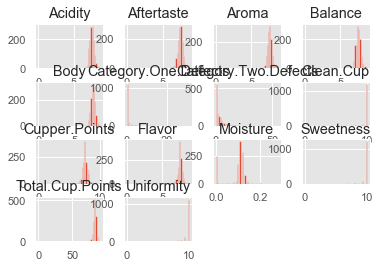

In [6]:
#histograms of the distributions of the different features
df2.hist(bins=50)

# Feature Selection
All categorical features and the features identifying the countries of origin were removed. The remaining features were the numerical features, excluding the ones with a near uniform distribution. Correlation between variables was also looked at.

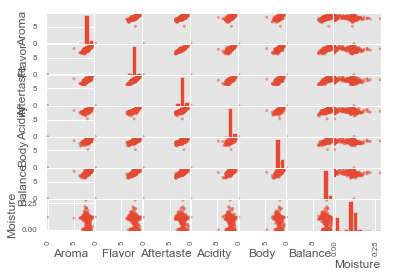

In [7]:
df3 = df_full[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Moisture']]
pd.plotting.scatter_matrix(df3)
plt.show()

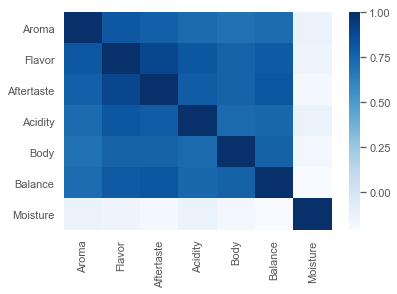

In [8]:
sns.heatmap(df3.corr(),cmap='Blues',annot=False) 

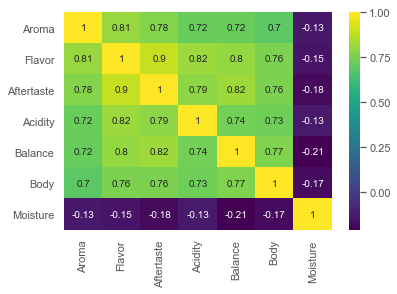

In [9]:
k = 7 #number of variables for heatmap
cols = df3.corr().nlargest(k, 'Aroma')['Aroma'].index
cm = df3[cols].corr()
sns.heatmap(cm, annot=True, cmap = 'viridis')

# Categories
We decided which labels to consider based on the size of each category.

In [10]:
# Number of samples from each country
df_full['Country.of.Origin'].value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Nicaragua                        26
Uganda                           26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
United States                     8
Myanmar                           8
Vietnam                           7
Haiti                             6
Philippines                       5
Panama                            4
United States (Puerto Rico)       4
Laos                              3
Burundi                     

### Country selection
Filter out countries with less than 100 samples

In [11]:
countries = ['Brazil','Mexico','Guatemala','Colombia']
df = df_full[df_full['Country.of.Origin'].isin(countries)]

##### Example exploration: Mean of Flavors

Country.of.Origin
Brazil       7.573561
Colombia     7.597104
Guatemala    7.489006
Mexico       7.379025
Name: Flavor, dtype: float64

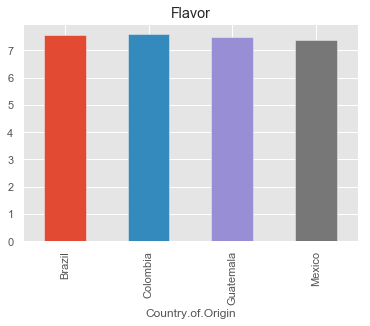

In [12]:
df.groupby('Country.of.Origin')['Flavor'].mean().plot(kind='bar', title='Flavor')
df.groupby('Country.of.Origin')['Flavor'].mean()

## Create new dataset based on chosen features

In [13]:
features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Moisture', 'Country.of.Origin']
df_red = df[features]
X = df_red[features[:-1]]
y = df_red['Country.of.Origin']

#### Pair plots of features

/home/ryantly3/Miniconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


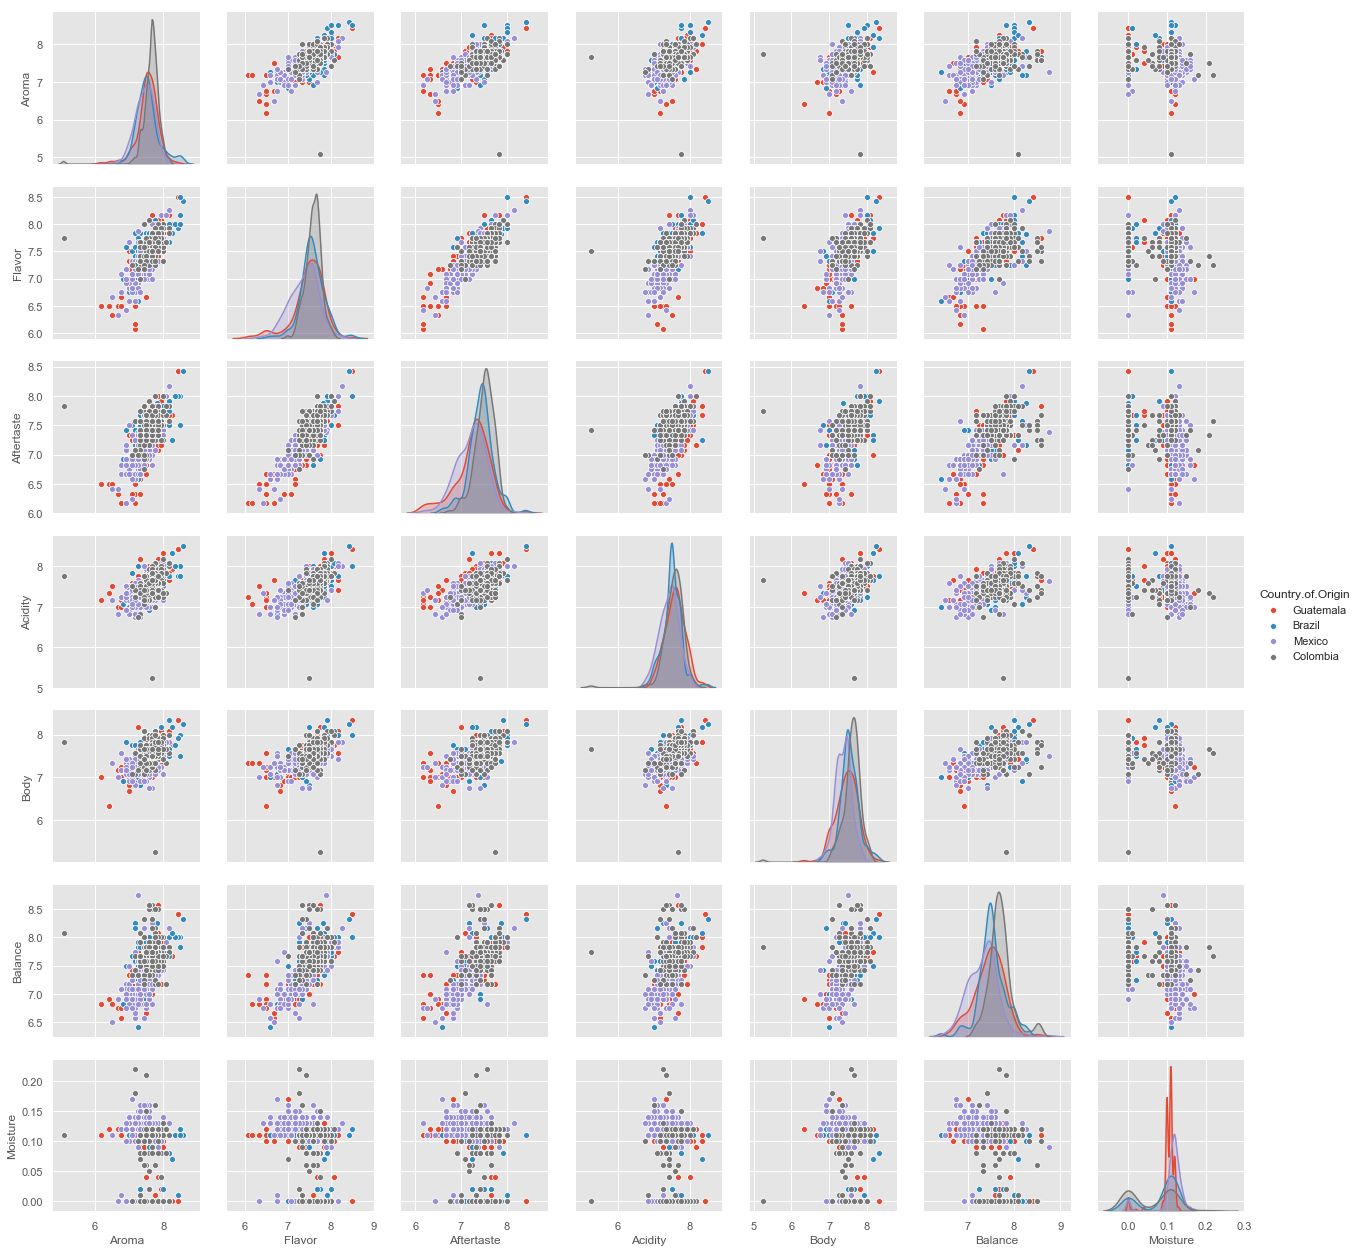

In [14]:
sns.pairplot(df_red, hue='Country.of.Origin')

## Split data into training and test data

In [15]:
# Fraction of dataset we want to use as training data
frac_train = 0.85 
frac_test = 1 - frac_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = frac_test, random_state = 2)

# Normalize data
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test) 

# Check dimensions of new dataframes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((622, 7), (622,), (110, 7), (110,))

# Logistic regression

### Parameter tuning: grid search with cross validation
Choose the optimal regularization parameter and the optimal solver

In [48]:
# Vary the regularization parameter 
C_list = np.arange(10.0, 30.0)

#parameters = {'C': C_list}
parameters_logreg = {'solver' : ('liblinear', 'newton-cg', 'lbfgs'), 'C' : C_list}
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
gridsearch_logreg = GridSearchCV(logreg, parameters_logreg)
gridsearch_logreg.fit(X_train, y_train)

print("Best parameter: ", gridsearch_logreg.best_params_)

Best parameter:  {'C': 20.0, 'solver': 'liblinear'}


## Train and test model

In [17]:
# Instantiate learning model
logreg = LogisticRegression(solver = 'liblinear', C = 20)

# Fit the model
logreg.fit(X_train, y_train)

# Predict Y_test 
y_pred = logreg.predict(X_test)

# Accuracy
acc_logreg_train = logreg.score(X_train, y_train)
acc_logreg_test = logreg.score(X_test, y_test)
print("Train accuracy:", acc_logreg_train)
print("Test accuracy: ", acc_logreg_test) 


Train accuracy: 0.5514469453376206
Test accuracy:  0.42727272727272725


/home/ryantly3/Miniconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Logistic regression with normalized data
#### Parameter tuning

In [49]:
# Vary the regularization parameter 
C_list = np.arange(1.0, 20.0)

#parameters = {'C': C_list}
parameters_logreg = {'solver' : ('liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'), 'C' : C_list}
logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train)
gridsearch_logreg = GridSearchCV(logreg, parameters_logreg)
gridsearch_logreg.fit(X_train_norm, y_train)

print("Best parameter: ", gridsearch_logreg.best_params_)

Best parameter:  {'C': 1.0, 'solver': 'liblinear'}


#### Train and test model

In [19]:
# Instantiate learning model
logreg = LogisticRegression(solver = 'liblinear', C = 1)

# Fit the model
logreg.fit(X_train_norm, y_train)

# Predict Y_test 
y_pred_norm = logreg.predict(X_test_norm)

# Accuracy
acc_logreg_train_norm = logreg.score(X_train_norm, y_train)
acc_logreg_test_norm = logreg.score(X_test_norm, y_test) 
print("Train accuracy:", acc_logreg_train_norm)
print("Test accuracy: ", acc_logreg_test_norm) 


Train accuracy: 0.5482315112540193
Test accuracy:  0.45454545454545453


/home/ryantly3/Miniconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Confusion matrix

In [20]:
import itertools

def plot_confusion_matrix(cm, classes, print = False, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    """
    # Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py 
    Function for printing and plotting the confusion matrix. 
    If 'normalize=True', the matrix is normalized. 
    """
    plt.rcParams['figure.figsize'] = [15, 10]

    if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    if print == True:
        if normalize:
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix without normalization')
        print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction = 0.045)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

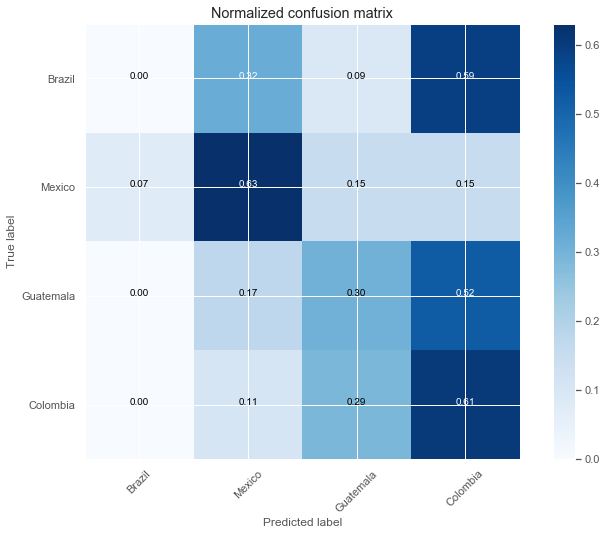

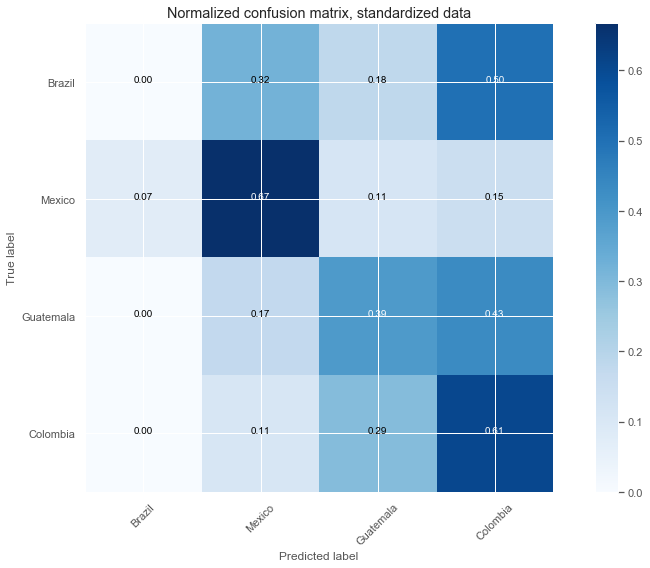

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(12,8))
plot_confusion_matrix(cnf_matrix, classes=countries, normalize=True,
                      title='Normalized confusion matrix')

# Confusion matrix normalized data
cnf_matrix_norm = confusion_matrix(y_test, y_pred_norm)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cnf_matrix_norm, classes=countries, normalize=True,
                      title='Normalized confusion matrix, standardized data')

plt.tight_layout()

# k-Nearest Neighbors

## Choosing k

#### Grid search
Grid search with cross validation to find the best k

In [22]:
k_list = np.arange(1, 50)
parameters_knn = {'n_neighbors' : k_list}

# Fit knn model and gridsearch
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
gridsearch_knn = GridSearchCV(knn, parameters_knn, cv = 10)
gridsearch_knn.fit(X_train, y_train)

print("Best parameter: ", gridsearch_knn.best_params_)

Best parameter:  {'n_neighbors': 28}


/home/ryantly3/Miniconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Train and test model

In [23]:
# Instantiate learning model
k = 28
knn = KNeighborsClassifier(n_neighbors = k)

# Fit the model
knn.fit(X_train, y_train)

# Predict Y_test 
y_pred = knn.predict(X_test)

# Accuracy
acc_knn_train = knn.score(X_train, y_train)
acc_knn_test = knn.score(X_test, y_test)
print("Train accuracy:", acc_knn_train)
print("Test accuracy:", acc_knn_test) 

Train accuracy: 0.545016077170418
Test accuracy: 0.44545454545454544


### kNN with normalized data

In [24]:
k_list = np.arange(1, 50)
parameters_knn = {'n_neighbors' : k_list}

# Fit knn model and gridsearch
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
gridsearch_knn = GridSearchCV(knn, parameters_knn, cv = 10)
gridsearch_knn.fit(X_train_norm, y_train)

print("Best parameter: ", gridsearch_knn.best_params_)

Best parameter:  {'n_neighbors': 32}


/home/ryantly3/Miniconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
# Instantiate learning model
k = 32
knn = KNeighborsClassifier(n_neighbors = k)

# Fit the model
knn.fit(X_train_norm, y_train)

# Predict Y_test 
y_pred_norm = knn.predict(X_test_norm)

# Accuracy
acc_knn_train_norm = knn.score(X_train_norm, y_train)
acc_knn_test_norm = knn.score(X_test_norm, y_test) # accuracy_score(y_test, y_pred)
print("Train accuracy:", acc_knn_train_norm)
print("Test accuracy:", acc_knn_test_norm) 

Train accuracy: 0.572347266881029
Test accuracy: 0.4636363636363636


### Confusion matrix

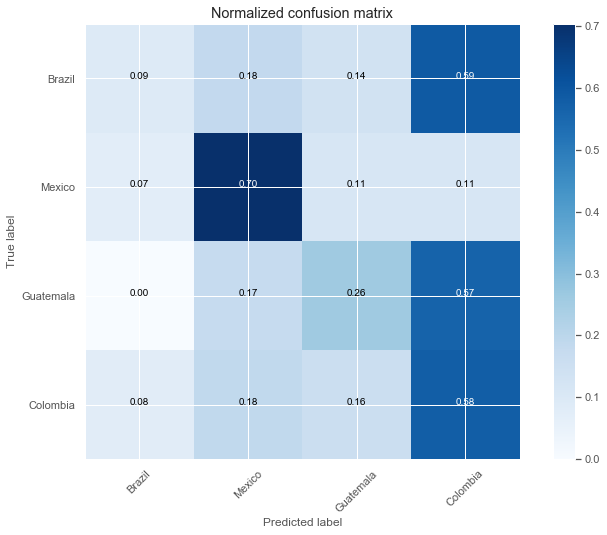

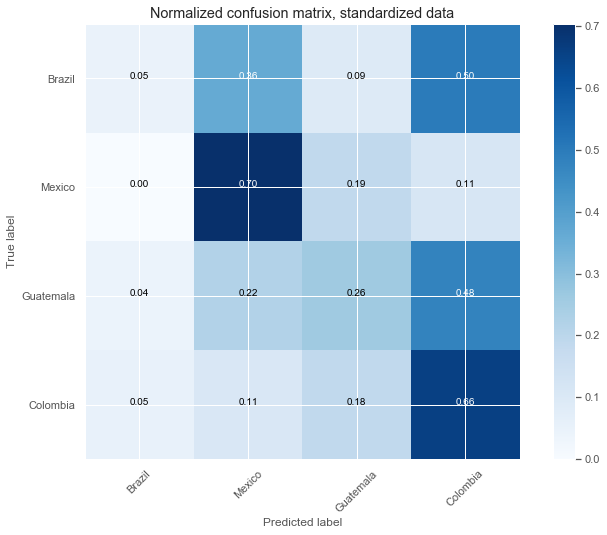

In [26]:
# Compute confusion matrix
np.set_printoptions(precision=2)
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure(figsize=(12,8))
plot_confusion_matrix(cnf_matrix, classes=countries, normalize=True,
                      title='Normalized confusion matrix')

# Confusion matrix normalized data
cnf_matrix_norm = confusion_matrix(y_test, y_pred_norm)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cnf_matrix_norm, classes=countries, normalize=True,
                      title='Normalized confusion matrix, standardized data')
plt.show()

# Neural Networks

## Shallow Neural Network

### Construct shallow network model

In [27]:
# relu activation function and adam optimizer
#model_shallow = MLPClassifier(hidden_layer_sizes=(128,16),max_iter=2200, random_state = 1, activation = 'relu', solver = 'adam')

# relu activation function and sgd optimizer -- best performance
model_shallow = MLPClassifier(hidden_layer_sizes=(128,16),max_iter=2200, random_state = 1, activation = 'relu', solver = 'sgd')

# relu activation function and lbfgs optimizer
#model_shallow = MLPClassifier(hidden_layer_sizes=(128,16),max_iter=2200, random_state = 71, activation = 'relu', solver = 'lbfgs')

# logistic activation function and adam optimizer
#model_shallow = MLPClassifier(hidden_layer_sizes=(128,16),max_iter=2200, random_state = 1, activation = 'logistic', solver = 'adam')

# logistic activation function and sgd optimizer
#model_shallow = MLPClassifier(hidden_layer_sizes=(128,16),max_iter=2200, random_state = 1, activation = 'logistic', solver = 'sgd')

# logistic activation function and lbfgs optimizer
#model_shallow = MLPClassifier(hidden_layer_sizes=(128,16),max_iter=2200, random_state = 1, activation = 'logistic', solver = 'lbfgs')

# tanh activation function and adam optimizer
#model_shallow = MLPClassifier(hidden_layer_sizes=(128,16),max_iter=2200, random_state = 1, activation = 'tanh', solver = 'adam')

# tanh activation function and sgd optimizer
#model_shallow = MLPClassifier(hidden_layer_sizes=(128,16),max_iter=2200, random_state = 1, activation = 'tanh', solver = 'sgd')

# tanh activation function and lbfgs optimizer
#model_shallow = MLPClassifier(hidden_layer_sizes=(128,16),max_iter=2200, random_state = 1, activation = 'tanh', solver = 'lbfgs')


### Train neural network

In [28]:
model_shallow.fit(X_train_norm,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 16), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Predict labels with shallow nerual network and display results

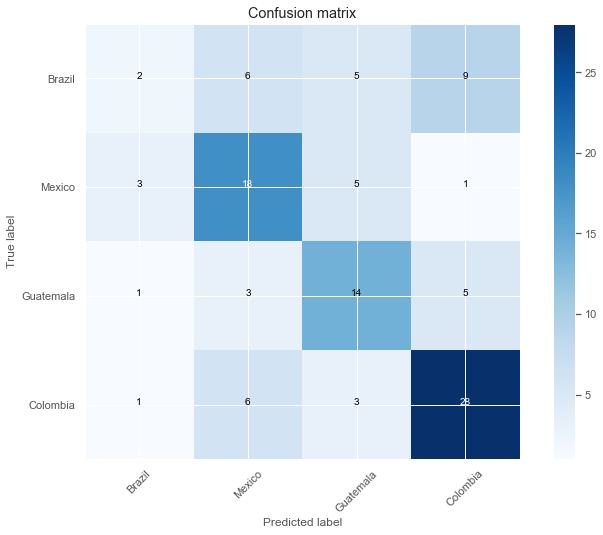

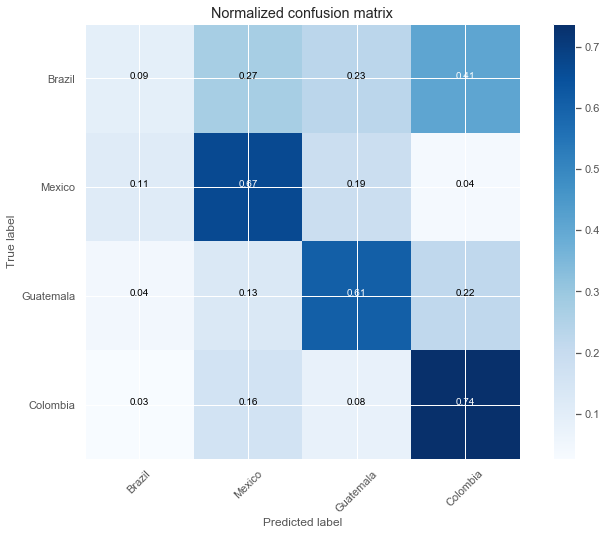

Accuracy: 0.5636363636363636


In [29]:
# make predictions with trained models
y_pred_shallow = model_shallow.predict(X_test_norm)

# construct confusion matrix from predictions
cm_shallow = confusion_matrix(y_test,y_pred_shallow)

#plot the confusion matrix
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm_shallow, classes=countries, normalize=False,
                      title='Confusion matrix')

#normalize and plot the confusion matrix
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm_shallow, classes=countries, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_shallow))

## Deep Neural Network

### Construct Deep Network Model

In [30]:
#relu activation with adam optimization
#model_deep = MLPClassifier(hidden_layer_sizes=(128,64, 64, 16, 16),max_iter=1700, random_state = 71, activation = 'relu', solver = 'adam')

#relu activation with sgd optimization
#model_deep = MLPClassifier(hidden_layer_sizes=(128,64, 64, 16, 16),max_iter=1700, random_state = 71, activation = 'relu', solver = 'sgd')

#relu activation with lbfgs optimization
#model_deep = MLPClassifier(hidden_layer_sizes=(128,64, 64, 16, 16),max_iter=1700, random_state = 71, activation = 'relu', solver = 'lbfgs')

#logistic activation with adam optimization
#model_deep = MLPClassifier(hidden_layer_sizes=(128,64, 64, 16, 16),max_iter=1700, random_state = 71, activation = 'logistic', solver = 'adam')

#logistic activation with sgd optimization
#model_deep = MLPClassifier(hidden_layer_sizes=(128,64, 64, 16, 16),max_iter=1700, random_state = 71, activation = 'logistic', solver = 'sgd')

#logistic activation with lbfgs optimization
#model_deep = MLPClassifier(hidden_layer_sizes=(128,64, 64, 16, 16),max_iter=1700, random_state = 71, activation = 'logistic', solver = 'lbfgs')

#tanh activation with adam optimization
#model_deep = MLPClassifier(hidden_layer_sizes=(128,64, 64, 16, 16),max_iter=1700, random_state = 71, activation = 'tanh', solver = 'adam')

#tanh activation with sgd optimization
model_deep = MLPClassifier(hidden_layer_sizes=(128,64, 64, 16, 16),max_iter=1700, random_state = 71, activation = 'tanh', solver = 'sgd')

#tanh activation with lbfgs optimization
#model_deep = MLPClassifier(hidden_layer_sizes=(128,64, 64, 16, 16),max_iter=1700, random_state = 71, activation = 'tanh', solver = 'lbfgs')

### Train Neural Network

In [31]:
model_deep.fit(X_train_norm,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 64, 64, 16, 16), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1700, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=71, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Predict labels with deep nerual network and display results

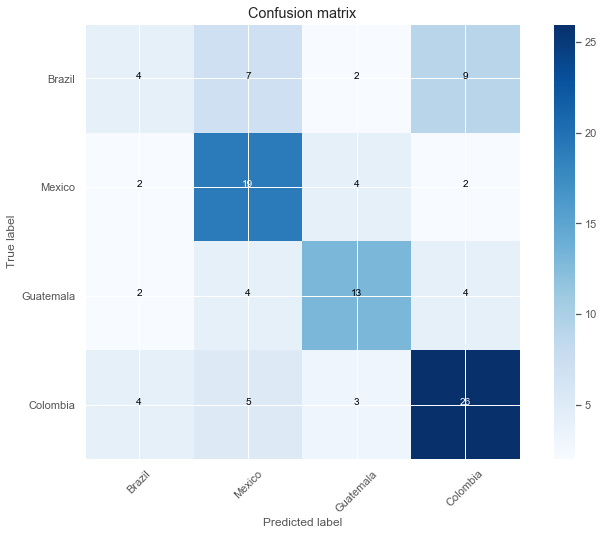

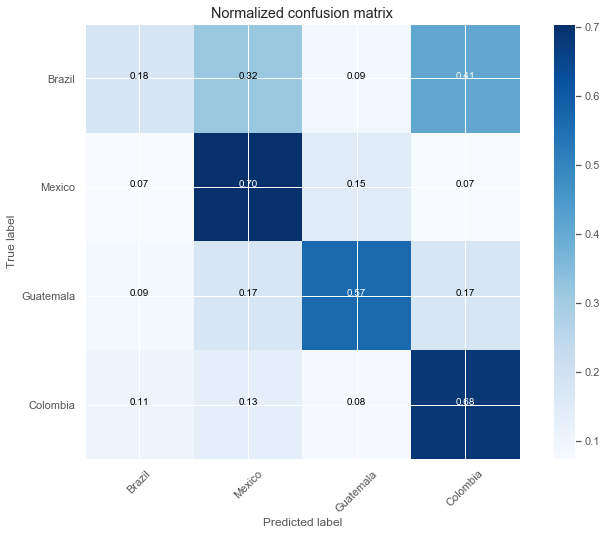

Accuracy: 0.5636363636363636


In [32]:
# make predictions with trained models
y_pred_deep = model_deep.predict(X_test_norm)

# construct confusion matrix from predictions
cm_deep = confusion_matrix(y_test,y_pred_deep)

#plot the confusion matrix
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm_deep, classes=countries, normalize=False,
                      title='Confusion matrix')

#normalize and plot the confusion matrix
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm_deep, classes=countries, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_deep))

# Random Forest

### Feature importance 

/home/ryantly3/Miniconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5,1,'Feature Importance in Random Forests')

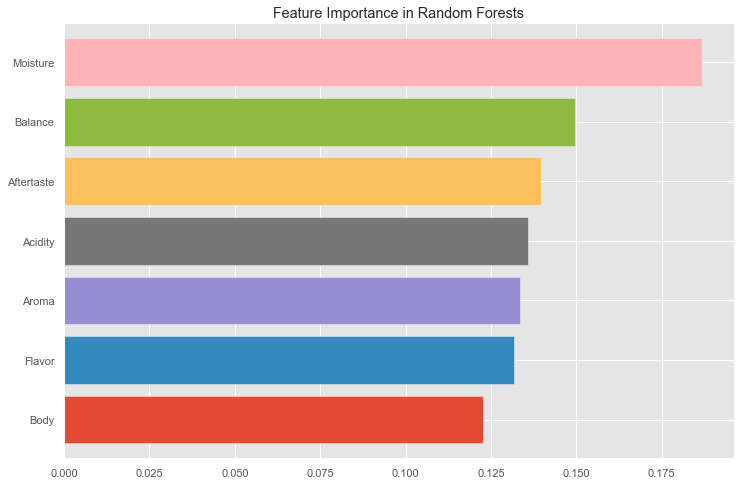

In [33]:
clf = RandomForestClassifier()
clf.fit(X, y)
f,ax=plt.subplots(figsize=(12,8))
pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
ax.set_title('Feature Importance in Random Forests')

              precision    recall  f1-score   support

      Brazil       0.53      0.41      0.46        22
    Colombia       0.61      0.74      0.67        27
   Guatemala       0.58      0.65      0.61        23
      Mexico       0.68      0.61      0.64        38

   micro avg       0.61      0.61      0.61       110
   macro avg       0.60      0.60      0.59       110
weighted avg       0.61      0.61      0.60       110

0.6090909090909091


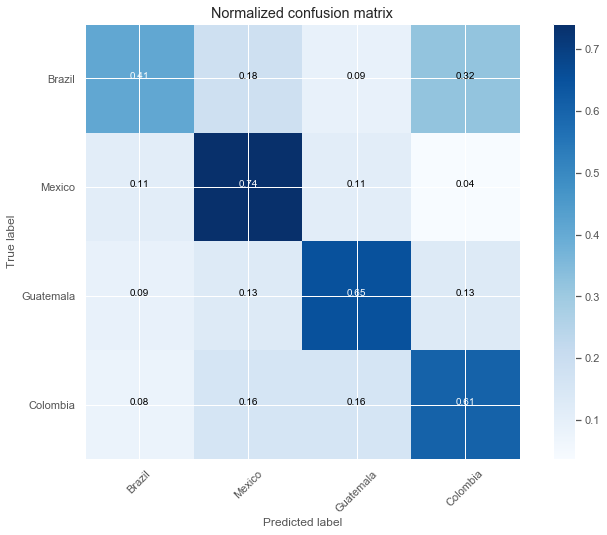

<Figure size 1080x720 with 0 Axes>

In [34]:
random_forest = RandomForestClassifier(n_estimators=1000, random_state=0)
random_forest.fit(X_train_norm, y_train)
y_pred = random_forest.predict(X_test_norm)
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cnf_matrix, classes=countries, normalize=True,
                      title='Normalized confusion matrix')
plt.figure()
#sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

### Randomized search cross validation for best n_estimators and max_features

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,}

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_norm, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.1s finished


{'n_estimators': 900, 'max_features': 'sqrt'}


In [36]:
Y_pred_random = rf_random.best_estimator_.predict(X_test_norm)
print(accuracy_score(y_test,Y_pred_random))

0.6272727272727273


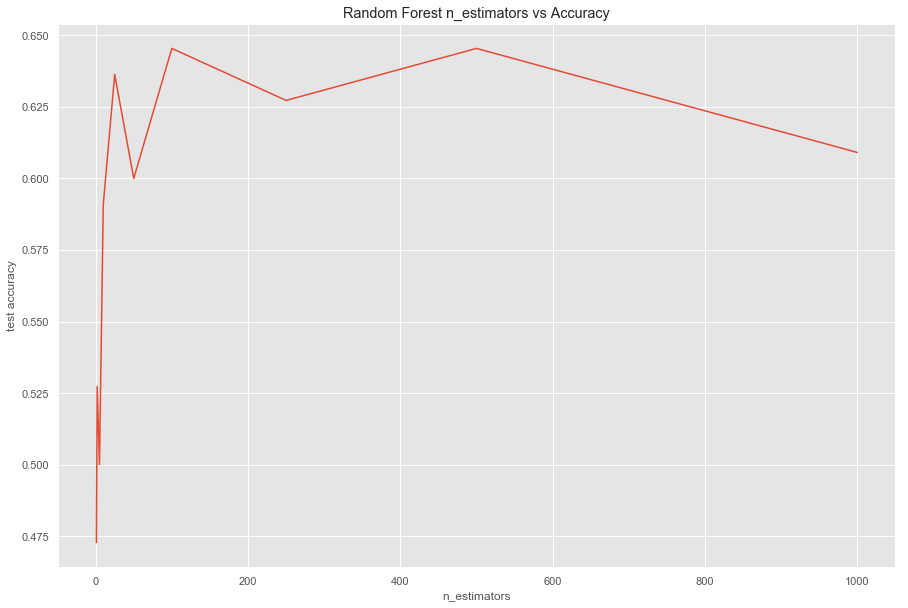

In [37]:
n = []
accuracy = []
for nn in [1,2,5,10,25,50,100,250,500,1000]:
    random_forest2 = RandomForestClassifier(n_estimators=nn, random_state=0)
    random_forest2.fit(X_train_norm, y_train)
    y_pred2 = random_forest2.predict(X_test_norm)
    n.append(nn)
    accuracy.append(accuracy_score(y_test, y_pred2))
plt.plot(n,accuracy)
plt.gca().set_title('Random Forest n_estimators vs Accuracy')
plt.gca().set_xlabel('n_estimators')
plt.gca().set_ylabel('test accuracy')
plt.show()

# Gradient Boosting

              precision    recall  f1-score   support

      Brazil       0.67      0.18      0.29        22
    Colombia       0.58      0.70      0.63        27
   Guatemala       0.45      0.61      0.52        23
      Mexico       0.62      0.66      0.64        38

   micro avg       0.56      0.56      0.56       110
   macro avg       0.58      0.54      0.52       110
weighted avg       0.58      0.56      0.54       110

0.5636363636363636


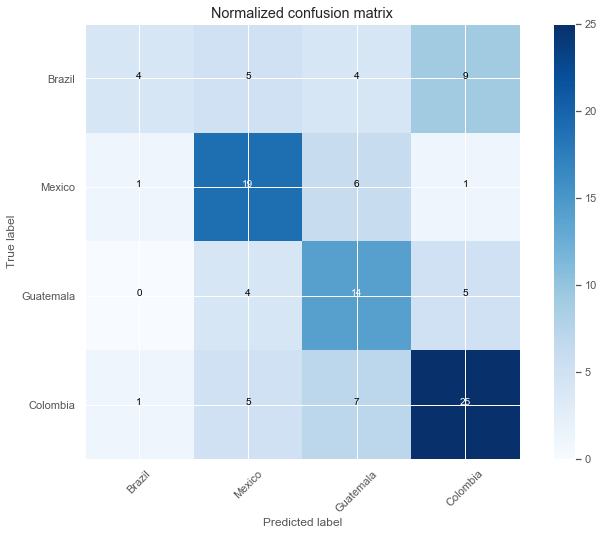

<Figure size 1080x720 with 0 Axes>

In [38]:
gradient_boost = sklearn.ensemble.GradientBoostingClassifier(n_estimators=100, random_state=0)
gradient_boost.fit(X_train_norm, y_train)
y_pred = gradient_boost.predict(X_test_norm)
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cnf_matrix, classes=countries, normalize=False,
                      title='Normalized confusion matrix')
plt.figure()
#sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

### Randomized search cross validation for best n_estimators and max_features

In [39]:
# Number of trees in gradient boosting
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,}

gb_random = RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train_norm, y_train)
print(gb_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.8s finished


{'n_estimators': 64, 'max_features': 'auto'}


In [40]:
Y_pred_random = gb_random.best_estimator_.predict(X_test_norm)
print(accuracy_score(y_test,Y_pred_random))

0.5818181818181818


# SVM

### Linear

              precision    recall  f1-score   support

      Brazil       0.25      0.05      0.08        22
    Colombia       0.53      0.67      0.59        27
   Guatemala       0.35      0.39      0.37        23
      Mexico       0.46      0.55      0.50        38

   micro avg       0.45      0.45      0.45       110
   macro avg       0.40      0.41      0.38       110
weighted avg       0.41      0.45      0.41       110

0.44545454545454544


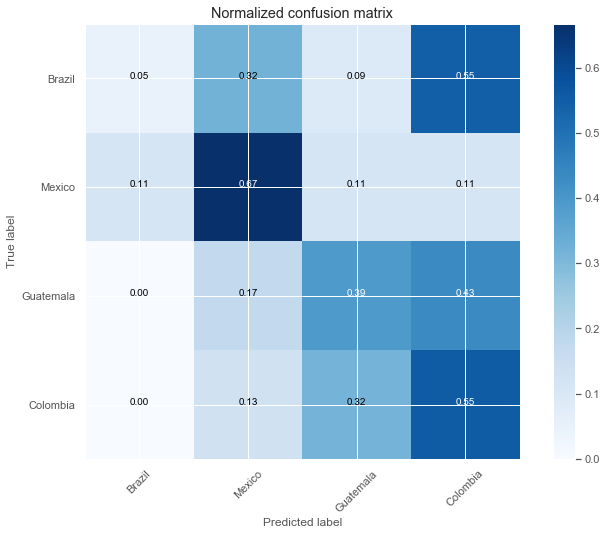

In [41]:
clf = SVC(kernel = 'linear')
clf.fit(X_train_norm, y_train)
y_pred = clf.predict(X_test_norm)
plt.figure(figsize=(12,8))
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix, classes=countries, normalize=True,
                      title='Normalized confusion matrix')
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

### RBF

              precision    recall  f1-score   support

      Brazil       0.20      0.05      0.07        22
    Colombia       0.55      0.78      0.65        27
   Guatemala       0.41      0.39      0.40        23
      Mexico       0.56      0.66      0.60        38

   micro avg       0.51      0.51      0.51       110
   macro avg       0.43      0.47      0.43       110
weighted avg       0.45      0.51      0.47       110

0.509090909090909


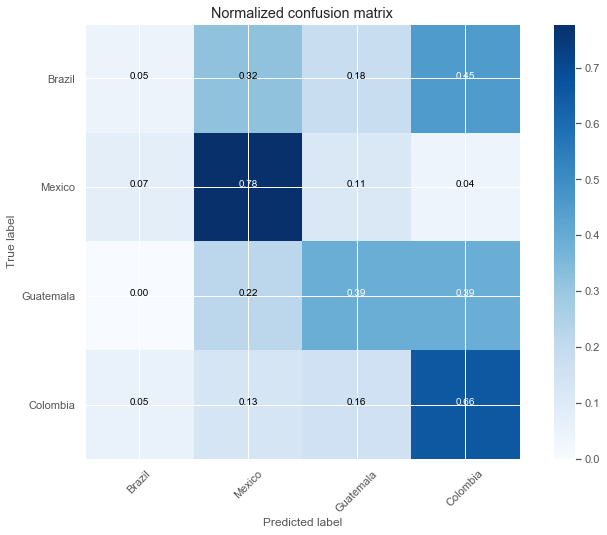

In [42]:
rclf = SVC(kernel = 'rbf')
rclf.fit(X_train_norm, y_train)
y_pred = rclf.predict(X_test_norm)
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cnf_matrix, classes=countries, normalize=True,
                      title='Normalized confusion matrix')
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

### Polynomial

              precision    recall  f1-score   support

      Brazil       0.00      0.00      0.00        22
    Colombia       0.52      0.41      0.46        27
   Guatemala       0.67      0.17      0.28        23
      Mexico       0.43      0.92      0.58        38

   micro avg       0.45      0.45      0.45       110
   macro avg       0.40      0.38      0.33       110
weighted avg       0.42      0.45      0.37       110

0.45454545454545453


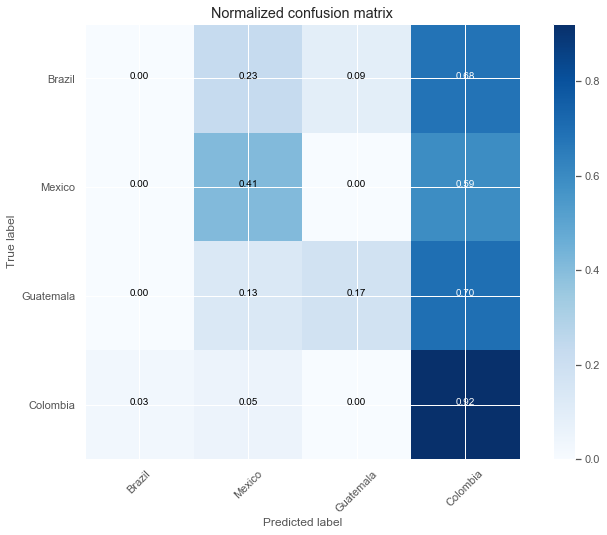

In [43]:
pclf = SVC(kernel = 'poly')
pclf.fit(X_train_norm, y_train)
y_pred = pclf.predict(X_test_norm)
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cnf_matrix, classes=countries, normalize=True,
                      title='Normalized confusion matrix')
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

## Best C Value

In [44]:
# Linear kernel
print('Linear kernel')
for c_val in np.power(2, np.arange(-4,5,1), dtype=np.float64):
    ### START TODO ###
    clf2 = SVC(kernel='linear')
    clf2.fit(X_train_norm, y_train)
    acc = clf2.score(X_test_norm, y_test)
    ### END TODO ###
    print('C = {}, SV# = {}, test accuracy = {}'.format(c_val, len(clf2.support_), acc))

# RBF kernel
print()
print('RBF kernel')
for c_val in np.power(2, np.arange(-4,5,1), dtype=np.float64):
    ### START TODO ###
    clf3 = SVC(C=c_val, kernel='rbf') 
    clf3.fit(X_train_norm, y_train)
    acc = clf3.score(X_test_norm, y_test)
    ### END TODO ###
    print('C = {}, SV# = {}, test accuracy = {}'.format(c_val, len(clf3.support_), acc))
    
# Polynomial kernel
print()
print('Polynomial kernel')
for c_val in np.power(2, np.arange(-4,5,1), dtype=np.float64):
    ### START TODO ###
    clf4 = SVC(C=c_val, kernel='poly') 
    clf4.fit(X_train_norm, y_train)
    acc = clf4.score(X_test_norm, y_test)
    ### START TODO ###
    print('C = {}, SV# = {}, test accuracy = {}'.format(c_val, len(clf4.support_), acc))

Linear kernel
C = 0.0625, SV# = 496, test accuracy = 0.44545454545454544
C = 0.125, SV# = 496, test accuracy = 0.44545454545454544
C = 0.25, SV# = 496, test accuracy = 0.44545454545454544
C = 0.5, SV# = 496, test accuracy = 0.44545454545454544
C = 1.0, SV# = 496, test accuracy = 0.44545454545454544
C = 2.0, SV# = 496, test accuracy = 0.44545454545454544
C = 4.0, SV# = 496, test accuracy = 0.44545454545454544
C = 8.0, SV# = 496, test accuracy = 0.44545454545454544
C = 16.0, SV# = 496, test accuracy = 0.44545454545454544

RBF kernel
C = 0.0625, SV# = 581, test accuracy = 0.45454545454545453
C = 0.125, SV# = 564, test accuracy = 0.4818181818181818
C = 0.25, SV# = 556, test accuracy = 0.509090909090909
C = 0.5, SV# = 544, test accuracy = 0.5181818181818182
C = 1.0, SV# = 527, test accuracy = 0.509090909090909
C = 2.0, SV# = 506, test accuracy = 0.509090909090909
C = 4.0, SV# = 480, test accuracy = 0.509090909090909
C = 8.0, SV# = 480, test accuracy = 0.509090909090909
C = 16.0, SV# = 476, 

# SVM Visualization using PCA

In [45]:
# Create projection of data to 2D using PCA
pca = PCA(n_components=2)
pca.fit(X_train_norm)
X_proj = pca.transform(X_train_norm)
var_values = pca.explained_variance_ratio_

# Projection with normalized data
pca = PCA(n_components=2)
pca.fit(X_train_norm)
X_proj_norm = pca.transform(X_train)
var_values_norm = pca.explained_variance_ratio_

<Figure size 1440x864 with 0 Axes>

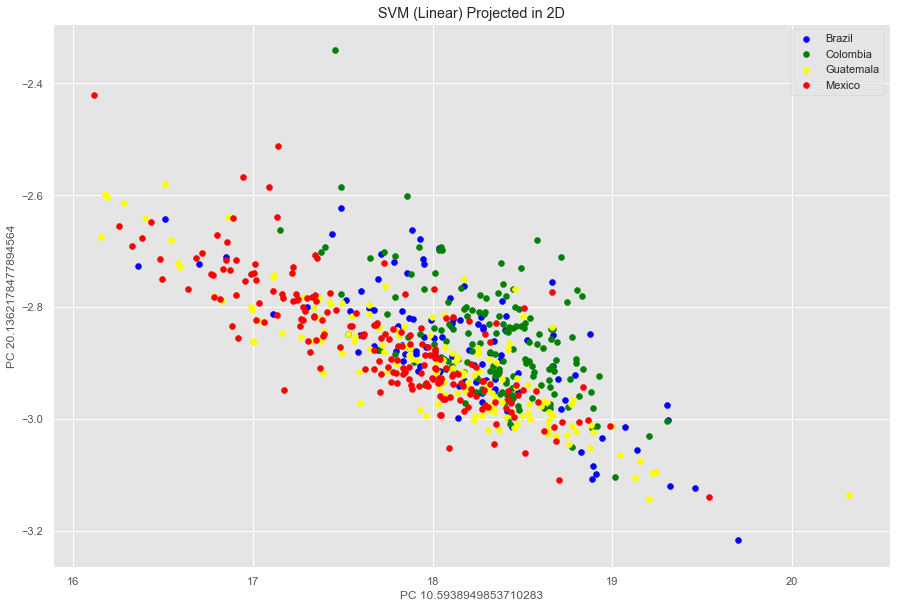

In [46]:
# Start plotting
fig = plt.figure(figsize=(20,12))

# Plot data points
group = y_train
cdict = {'Mexico': 'red', 'Brazil': 'blue', 'Colombia': 'green', 'Guatemala': 'yellow'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(X_proj_norm[ix,0], X_proj_norm[ix,1], c = cdict[g], label = g)
ax.legend()
ax.set_title('SVM (Linear) Projected in 2D')
ax.set_xlabel('PC 1' + str(var_values_norm[0]))
ax.set_ylabel('PC 2' + str(var_values_norm[1]))
plt.show()